In [1]:
# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the files
import io
%cd "C:\Users\anupz\Desktop\simplilearn\Machine Learning\data sets\Datasets\mercedes"

C:\Users\anupz\Desktop\simplilearn\Machine Learning\data sets\Datasets\mercedes


In [4]:
# Create dataframes
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
# Check the dataframe shape
train_df.shape,test_df.shape

((4209, 378), (4209, 377))

In [6]:
# Lets see how our tain data looks like
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# And our test data looks like this
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
# Check for the type of data
train_df.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [9]:
test_df.dtypes.value_counts()

int64     369
object      8
dtype: int64

In [10]:
# Here we can see we have target variable y in training dataset
# we have 8 categorical columns
# target variable is float

In [11]:
# Check for missing values
train_df.isnull().sum().value_counts()

0    378
dtype: int64

In [12]:
test_df.isnull().sum().value_counts()

0    377
dtype: int64

In [13]:
# No missing vaues

In [16]:
# Remove the columns with variance = 0
# We will first divide our data in numerical and categorical data
cat_col_train = train_df[['X0','X1','X2','X3','X4','X5','X6','X8']]
cat_col_test = test_df[['X0','X1','X2','X3','X4','X5','X6','X8']]
num_col_train = train_df.drop(['ID','y','X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)
num_col_test = test_df.drop(['ID','X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)

In [17]:
#Store our target variable in y
y = train_df.y

In [18]:
# Find the columns which has variance 0
remove_features = []
for col in num_col_train.columns:
    if(num_col_train[col].var()==0):
        remove_features.append(col)

print(remove_features)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [19]:
# Remove these columns from train and test dataset
num_col_train = num_col_train.drop(remove_features,axis=1)
num_col_test = num_col_test.drop(remove_features,axis=1)

In [20]:
# Lets see how our data looks now

In [21]:
num_col_train.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
num_col_test.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
# Check for unique values in datasets

In [24]:
uniques = []
for col in num_col_train.columns:
    uniques.append(num_col_train[col].unique())

In [25]:
uniques

[array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0],

In [26]:
# Here we see that numerical columns in training dataset consists of only 0s and 1s

In [27]:
uniques_test=[]
for col in num_col_test.columns:
    uniques_test.append(num_col_test[col].unique())

In [28]:
uniques_test

[array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0],

In [29]:
# Test dataset also consists of 0s and 1s

In [30]:
# Lets apply label encoder to categorical columns
from sklearn.preprocessing import OneHotEncoder

In [31]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [32]:
cat_col_train_array = ohe.fit_transform(cat_col_train)
cat_col_test_array = ohe.transform(cat_col_test)

In [33]:
cat_col_train_df = pd.DataFrame(cat_col_train_array.toarray(),columns=ohe.get_feature_names())
cat_col_test_df = pd.DataFrame(cat_col_test_array.toarray(),columns=ohe.get_feature_names())

In [34]:
# Lets see how it looks like
cat_col_train_df.head()

,x0_a,x0_aa,x0_ab,x0_ac,x0_ad,x0_af,x0_ai,x0_aj,x0_ak,x0_al,...,x7_p,x7_q,x7_r,x7_s,x7_t,x7_u,x7_v,x7_w,x7_x,x7_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
cat_col_test_df.head()

,x0_a,x0_aa,x0_ab,x0_ac,x0_ad,x0_af,x0_ai,x0_aj,x0_ak,x0_al,...,x7_p,x7_q,x7_r,x7_s,x7_t,x7_u,x7_v,x7_w,x7_x,x7_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Now lets merge the categorical and numerical data

In [37]:
merged_train = pd.concat([cat_col_train_df,num_col_train],axis=1)
merged_test = pd.concat([cat_col_test_df,num_col_test],axis=1)

In [38]:
merged_train.shape,merged_test.shape

((4209, 551), (4209, 551))

In [39]:
# Now our data is ready for dimentionality reduction and fitting into a model

In [40]:
# Perform the dimentionality reduction
# We can see visually that dataset looks like a sparse matrix. Lets check

In [41]:
array = np.array(merged_train)

In [42]:
array.size

2319159

In [43]:
# Number of 0s 
array.size - np.count_nonzero(array)

2041267

In [44]:
# Out of 2319159 , almost 2041267 are 0s. This means we have a sparse matrix
# Hence we can use truncatedSVD as dimentionality reduction technique here

In [45]:
from sklearn.decomposition import TruncatedSVD

In [48]:
# Since I cannot decide on the number of components right now, I am going to chose 3 components to compare
#75,100,150

In [49]:
tsvd_75 = TruncatedSVD(n_components=75)
tsvd_100 = TruncatedSVD(n_components=100)
tsvd_150 = TruncatedSVD(n_components=150)

In [50]:
train_75 = tsvd_75.fit_transform(merged_train)
train_100 = tsvd_100.fit_transform(merged_train)
train_150 = tsvd_150.fit_transform(merged_train)

In [51]:
test_75 = tsvd_75.transform(merged_test)
test_100 = tsvd_100.transform(merged_test)
test_150 = tsvd_150.transform(merged_test)

In [52]:
#Lets check the shapes of our datasets now
train_75.shape,test_75.shape

((4209, 75), (4209, 75))

In [53]:
train_100.shape,test_100.shape

((4209, 100), (4209, 100))

In [54]:
train_150.shape,test_150.shape

((4209, 150), (4209, 150))

In [55]:
# Now we can apply XGboost on our data to make predictions

In [56]:
from xgboost import XGBRegressor

In [57]:
xgbr_75 = XGBRegressor()
xgbr_100 = XGBRegressor()
xgbr_150 = XGBRegressor()

In [58]:
#  Lets fit the models now
model_75 = xgbr_75.fit(train_75,y)
model_100 = xgbr_100.fit(train_100,y)
model_150 = xgbr_150.fit(train_150,y)

In [59]:
# Lets make predictions now
ypred_75 = model_75.predict(test_75)
ypred_100 = model_100.predict(test_100)
ypred_150 = model_150.predict(test_150)

In [61]:
# Now lets plot the predictions and check visually
# we also need to check the amount of variation captured by each component size.
# So we will plot the explained variance ratio graph too.

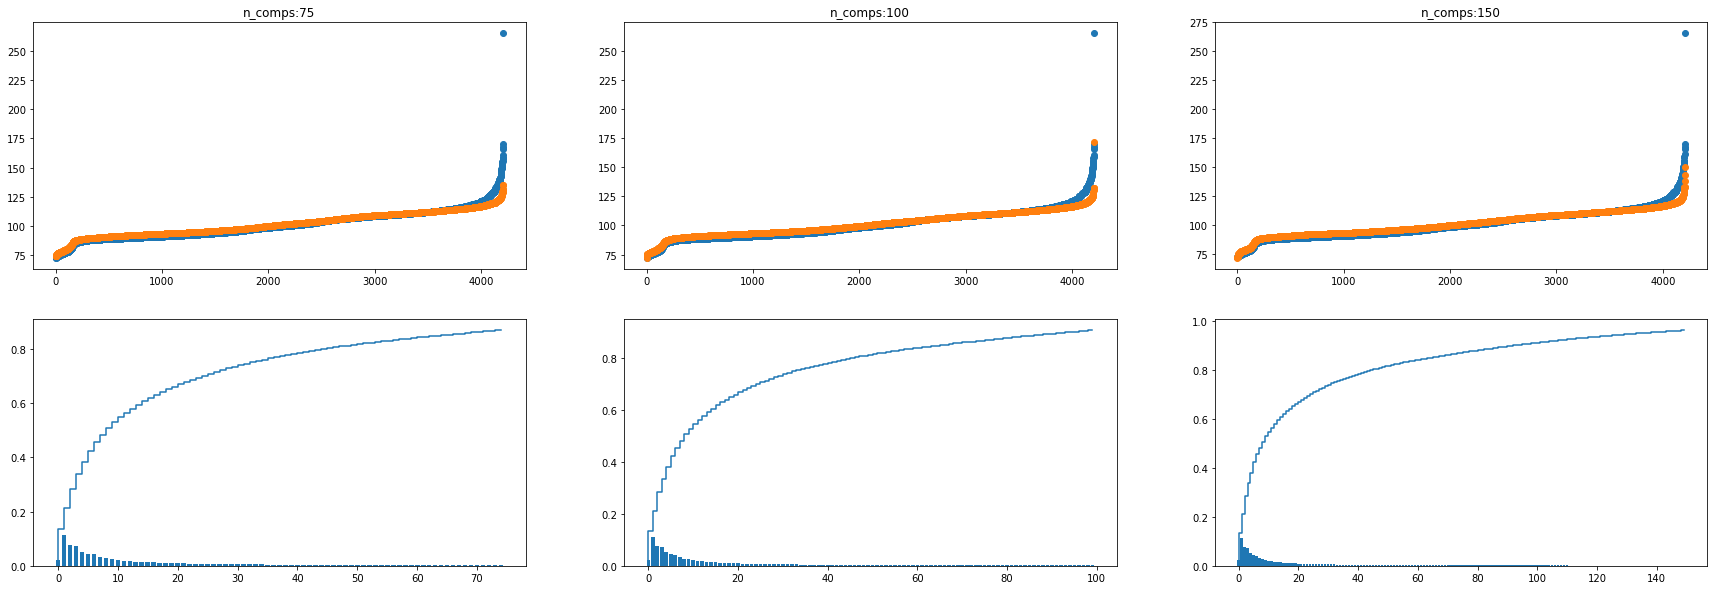

In [62]:
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(30,10))

axs[0,0].scatter(range(train_df.shape[0]),np.sort(train_df.y.values))
axs[0,0].scatter(range(train_df.shape[0]),np.sort(ypred_75))
axs[0,0].set_title('n_comps:75')

axs[1,0].bar(range(0,75),tsvd_75.explained_variance_ratio_)
axs[1,0].step(range(0,75),np.cumsum(tsvd_75.explained_variance_ratio_))
    
axs[0,1].scatter(range(train_df.shape[0]),np.sort(train_df.y.values))
axs[0,1].scatter(range(train_df.shape[0]),np.sort(ypred_100))
axs[0,1].set_title('n_comps:100')

axs[1,1].bar(range(0,100),tsvd_100.explained_variance_ratio_)
axs[1,1].step(range(0,100),np.cumsum(tsvd_100.explained_variance_ratio_))

axs[0,2].scatter(range(train_df.shape[0]),np.sort(train_df.y.values))
axs[0,2].scatter(range(train_df.shape[0]),np.sort(ypred_150))
axs[0,2].set_title('n_comps:150')

axs[1,2].bar(range(0,150),tsvd_150.explained_variance_ratio_)
axs[1,2].step(range(0,150),np.cumsum(tsvd_150.explained_variance_ratio_))

In [63]:
print('n_comps=75',np.sort(ypred_75)[4202:])
print('n_comps=100',np.sort(ypred_100)[4202:])
print('n_comps=150',np.sort(ypred_150)[4202:])

n_comps=75 [129.21628 129.51108 130.93517 130.93517 131.68979 135.26747 135.31323]
n_comps=100 [128.46835 130.12036 131.3288  132.07886 132.63722 132.63722 171.70251]
n_comps=150 [131.06941 133.07092 133.18137 133.18137 138.28513 143.3803  150.26051]


In [64]:
# Except from the last few entries in the array , there is no major difference the target variable. 
#But the maximum time has significantly reduced by applying XGboost algorithm


In [65]:
# From the explained variance ratio graph we can see that to capture 90% of variation in our data, 
#approximately 100 components are sufficient, So I choose n_comps=100

In [66]:
# Also if you see that if we are okay to compromise with the variation of the data to 60% 
#then we have to only approximately chose 20 components. 
# But considering the famous brand to keep its brand name, we need to atleast capture 90% of variation.

In [67]:
# Final model
final_model = model_100
final_predictions = ypred_100

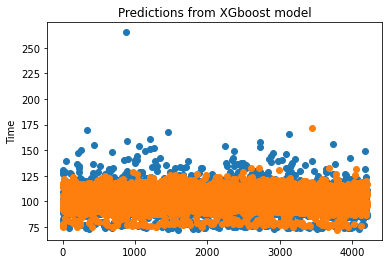

In [68]:
plt.scatter(range(train_df.shape[0]),train_df.y.values)
plt.scatter(range(train_df.shape[0]),final_predictions)
plt.title('Predictions from XGboost model')
plt.ylabel('Time')
plt.show()

In [69]:
# From the above graph we can see that the testing time on an average is same, 
#but we have been able to reduce the time to some extent.